In [1]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large
Z_{n+1} = Z_{n}^{1.5 * Z_{n}^{\sqrt{-1} * (p_{1}^{1.5 * Z_{n}^{p_{2}}})}}
\qquad \qquad \small p = [2.76544+0.997995j, 50.1518+7.53287j]
\end{eqnarray}""")

<IPython.core.display.Latex object>

### numerical oddity - (this may actually be what an unborn Unicorn looks like).
    Sequential iteration of difference equation:
    Z = Z^(1.5 * Z^(i * p(1)^(1.5 * Z^p(2)))
    
    with parameter set:
    p = [2.76544+0.997995j, 50.1518+7.53287j]
    
    on the complex plane computes this organic graphic.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [3]:
def unicorn_in_utero(Z, p, Z0=None, ET=None):
    """ Z = bugga_bear(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number # p = [2.76544+0.997995j, 50.1518+7.53287j]
    Returns:
        Z:    the result (complex)
    """
    Z = Z**(1.5 * Z**(1j * p[0]**(1.5 * Z**p[1])))
    return Z

In [4]:
#                                        
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = -0.25 + 0.0*1j
par_set['theta'] = 0.0
par_set['zoom'] = 5/8

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

p = [2.76544+0.997995j, 50.1518+7.53287j]

list_tuple = [(unicorn_in_utero, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

28.762897968292236 	 total time


In [5]:
#                  Escape Time Graphical norm - graphically easier data
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

converstion time =	 1.2502827644348145


coloring time =	 3.3344969749450684


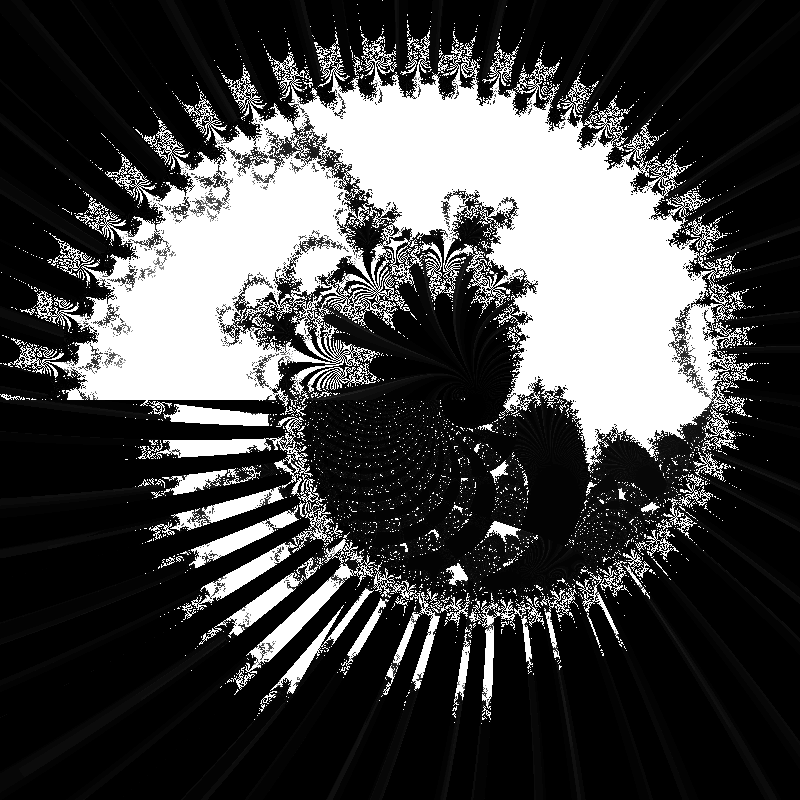

In [6]:
#                  Escape Time: darker escaped sooner
t0 = time.time()
ETd = ncp.mat_to_gray(ETn)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time =	 3.4714250564575195


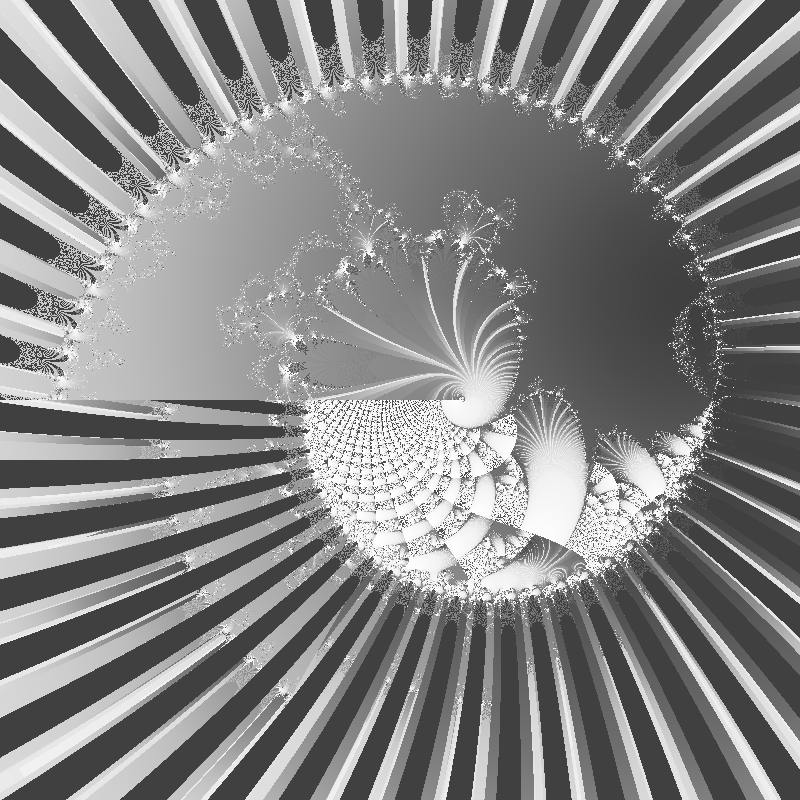

In [7]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 3.414013147354126


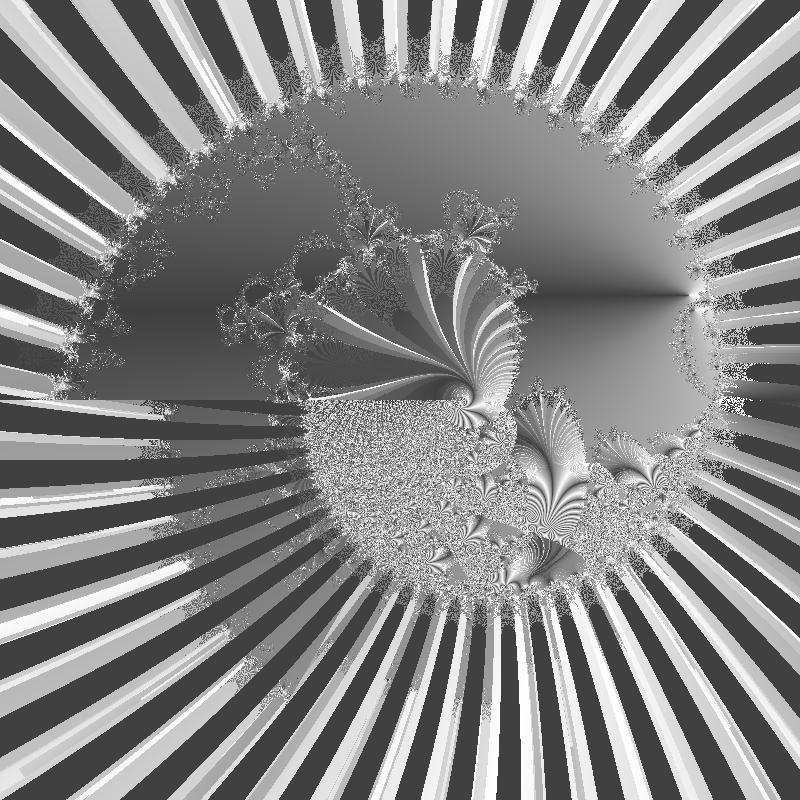

In [8]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(Zr, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(R)

coloring time:	 5.665673017501831


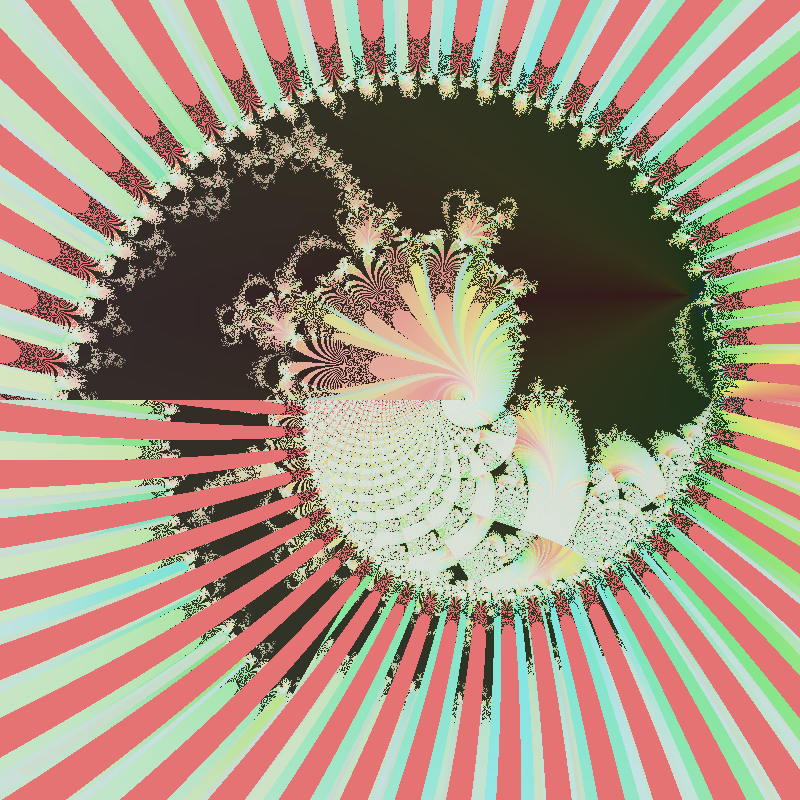

In [10]:
#                  Rotation > Hue, Distance > Saturation, Escape Time > Value (intensity-brightness) (muted)
H = Zr
S = 1 - ncp.graphic_norm(Zd)
V = 1 - ncp.graphic_norm(ET)

Hue_width = 0.5
H_min = 0.0
H_max = H_min + Hue_width

S_max = 0.5
S_min = 0.05

V_max = 0.9
V_min = 0.2
t0 = time.time()
Ihsv = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 5.697283744812012


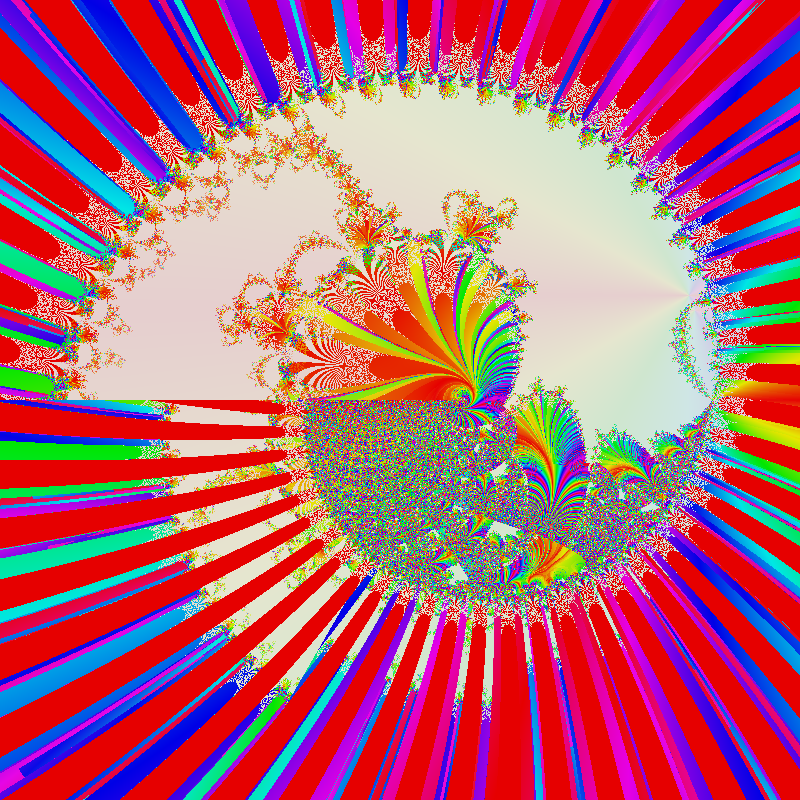

In [11]:
#                  Rotation > Hue, Escape Time > Saturation, Distance > Value (no significantly muted)
Z_v = Z-Z0
H = ncp.graphic_norm(np.arctan2(np.imag(Z_v), np.real(Z_v)))
S = 1 - ncp.graphic_norm(ET)
V = 1 - ncp.graphic_norm(Z_v)

Hue_width = 1.0
H_min = 0.0
H_max = H_min+Hue_width

S_max = 1.0
S_min = 0.1

V_max = 0.9
V_min = 0.0
t0 = time.time()
I = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(I)

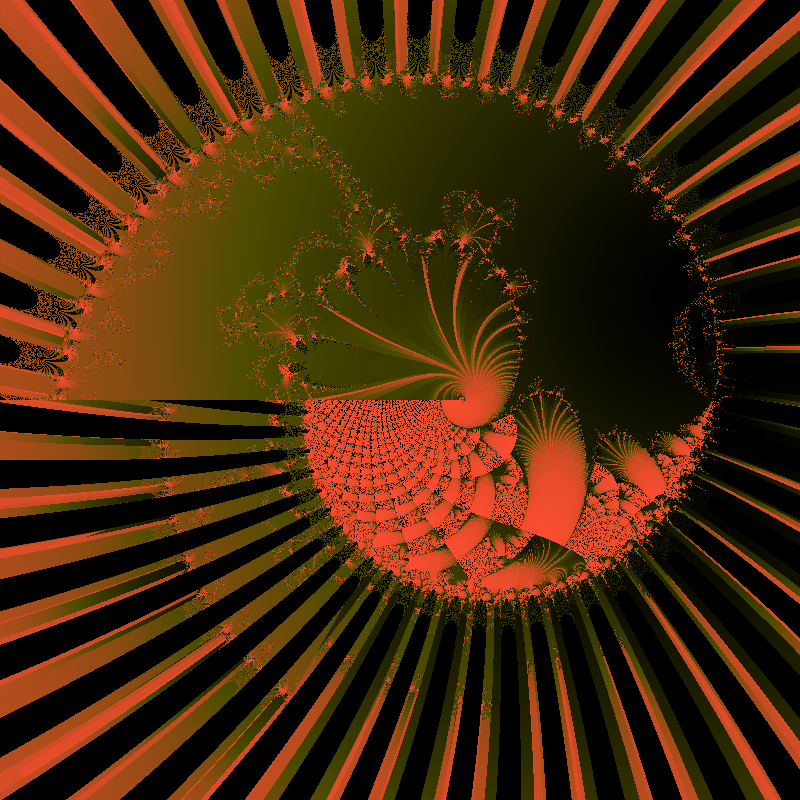

In [8]:
mp0 = np.array([[0,0,0],[0.3,0.3,0.0],[1.0,0.3,0.2]])
I_mapped = ncp.mat_to_mapped(Zd, mp0)
display(I_mapped)

In [12]:
#                                        
par_s = {'n_rows': 200, 'n_cols': 200}
par_s['center_point'] = -0.25 + 0.0*1j
par_s['theta'] = 0.0
par_s['zoom'] = 5/8

par_s['it_max'] = 64
par_s['max_d'] = 10 / par_s['zoom']
par_s['dir_path'] = os.getcwd()

p = [2.76544+0.997995j, 50.1518+7.53287j]

list_tuple_s = [(unicorn_in_utero, (p))]

t0 = time.time()
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple_s, par_s)
print(time.time() - t0, '\t total time')

2.3588719367980957 	 total time


ET =	 1


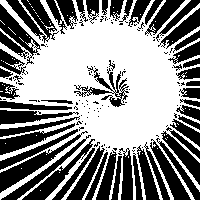

ET =	 2


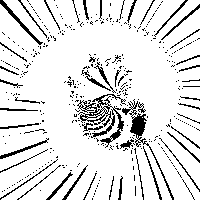

ET =	 3


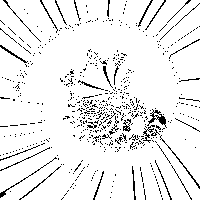

ET =	 4


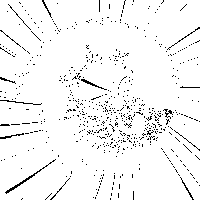

ET =	 5


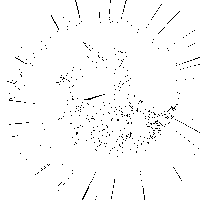

ET =	 6


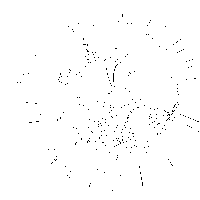

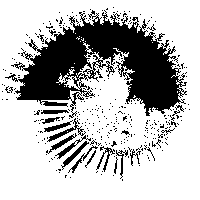

In [13]:
#                                        view smaller - individual escape time starting points
for t in range(1,7):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > 7] = 0
display(ncp.mat_to_gray(I))

In [14]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
print('\nHow many never escaped:\n>',(ET_sm > k).sum())

0 0
1 18202
2 4829
3 2906
4 1730
5 788
6 358
7 180
8 134
9 69
10 65
11 65
12 60
13 39
14 34
15 30
16 16
17 16
18 29
19 28
20 23
21 15
22 18
23 10
24 12
25 4
26 11
27 12
28 5
29 5
30 4
31 4
32 3
33 5
34 6
35 2
36 1
37 4
38 5
39 0
40 3
41 2
42 1
43 3
44 1
45 1
46 1
47 0
48 1
49 0
50 1
51 0
52 2
53 1
54 0
55 1
56 0
57 2
58 2
59 0
60 3
61 1
62 0
63 3
64 1

How many never escaped:
> 10243


In [15]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  2.10 131.6 degrees

    10243 total unescaped points

   points near V       (plane units)
    10243 within V/ 1  (2.103)
    10243 within V/ 2  (1.052)
    10241 within V/ 3  (0.701)
     9098 within V/ 4  (0.526)
     7479 within V/ 5  (0.421)
     5706 within V/ 6  (0.351)
     4507 within V/ 7  (0.300)
     3572 within V/ 8  (0.263)
     2889 within V/ 9  (0.234)
     2373 within V/10  (0.210)
     2014 within V/11  (0.191)


0.7205960750579834 	 total time
converstion time =	 0.11896705627441406 
	Distance


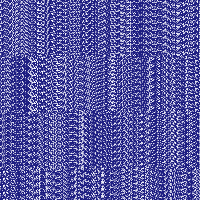

	Rotation


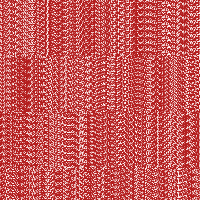

	Escape Time


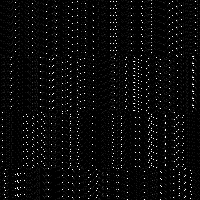

In [16]:
#             Project equation on scaled random plane parallel
par_s = {'n_rows': 200, 'n_cols': 200}
par_s['center_point'] = -0.25 + 0.0*1j
par_s['theta'] = 0.0
par_s['zoom'] = 5/8

par_s['it_max'] = 64
par_s['max_d'] = 10 / par_s['zoom']
par_s['dir_path'] = os.getcwd()

p = [2.76544+0.997995j, 50.1518+7.53287j]

list_tuple_s = [(unicorn_in_utero, (p))]

par_s['RANDOM_PLANE'] = True

t0 = time.time()
ET_s, Z_s, Z0_s = ig.get_primitives(list_tuple_s, par_s)
print(time.time() - t0, '\t total time')
t0 = time.time()
Zd_s, Zr_s, ETn_s = ncp.etg_norm(Z0_s, Z_s, ET_s)

print('converstion time =\t',time.time() - t0,'\n\tDistance')
display(ncp.mat_to_blue(Zd_s))
print('\tRotation')
display(ncp.mat_to_red(Zr_s))
print('\tEscape Time')
display(ncp.mat_to_gray(ETn_s))

In [35]:
V_bad = Zd
V_g = 1-Zd

In [36]:
print(V_bad.max(), V_bad.min())
print(V_g.max(), V_g.min())

1.0 0.0
1.0 0.0


In [39]:
print((V_bad < 0.1).sum())

639992
